### Imports

In [3]:
# Utility

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
import re
import time
from IPython.display import clear_output
warnings.filterwarnings('ignore')

# Models

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from xgboost import XGBClassifier as XGBC
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier

# Exploring the Task

In [3]:
TRAIN = pd.read_csv('train.csv')
TEST = pd.read_csv('test.csv')

In [4]:
TRAIN = TRAIN.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
TEST = TEST.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Exploratory Data Analysis

In [5]:
TRAIN

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [6]:
TRAIN.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

No Null values

In [7]:
TRAIN.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### Visualising Class Distribution

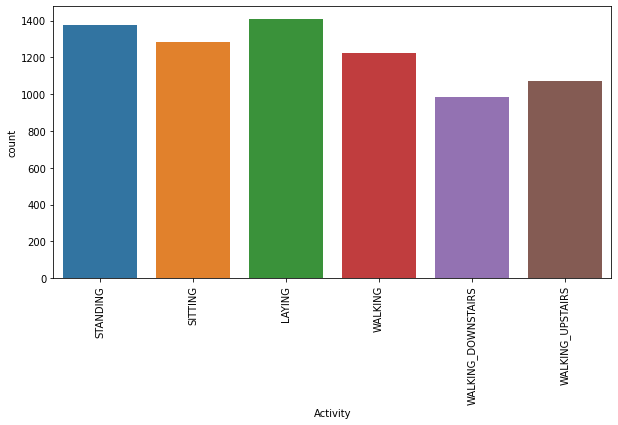

In [8]:
plt.figure(figsize=(10,5))
axis=sns.countplot(x="Activity",data=TRAIN)
plt.xticks(x=TRAIN['Activity'],rotation='vertical')
plt.show()

### Label Encoding

In [9]:
train = TRAIN.drop(['subject'], axis=1)

TRAINX = train.drop(['Activity'], axis=1)

LE = LabelEncoder()
TRAINY = LE.fit_transform(train['Activity'])

### Feature Scaling

In [10]:
scaler = StandardScaler()
scaler.fit(TRAINX)

StandardScaler()

In [11]:
TRAINX = pd.DataFrame(scaler.transform(TRAINX), columns=TRAINX.columns)
TRAINX

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


In [12]:
TRAIN = pd.concat([TRAINX, pd.DataFrame(TRAINY, columns=['Activity'])], axis=1)
TRAIN

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,2
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,2
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,2
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,2
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,5
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,5
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,5
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,5


This is a very high dimensional data, so we should try **Dimensionality Reduction**.

#### PCA

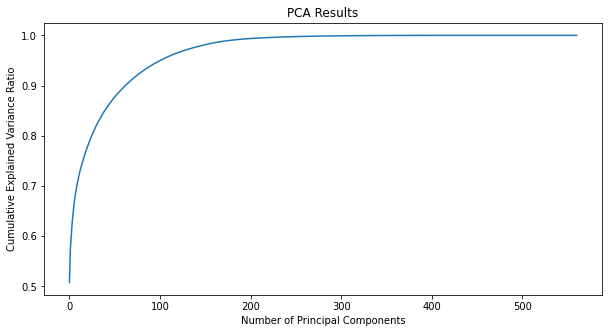

In [98]:
pca = PCA()
pca.fit(TRAINX)

cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(cum_var_ratio)
plt.title("PCA Results")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

If we will apply PCA then about 100 to 150 principal components will be sufficient to model the given data.

If we attempt to visualise the data using the first two Principal Components...

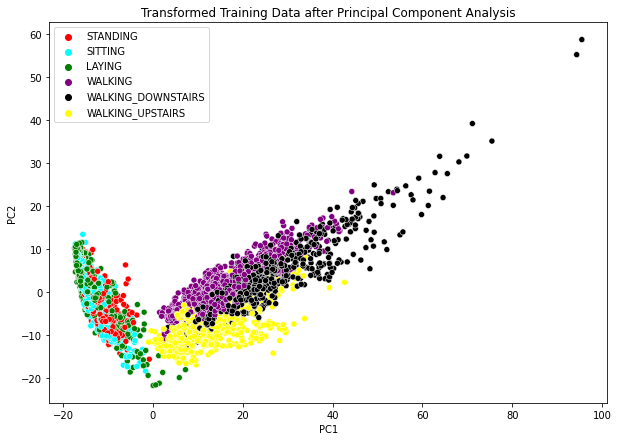

In [99]:
pca = PCA(n_components=2)
pca.fit(TRAINX, TRAINY)
pcaX = pd.DataFrame(pca.transform(TRAINX), columns=['PC1', 'PC2'])
pcaY = LE.inverse_transform(TRAINY)
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue=pcaY, data=pcaX, palette=["red","cyan","green","purple","black","yellow"])
plt.title("Transformed Training Data after Principal Component Analysis") 
plt.show()

This scatter plot isn't very helpful since the clusters are not distinct. Hence, using 2 PC's for visualisation won't work for us.

#### LDA

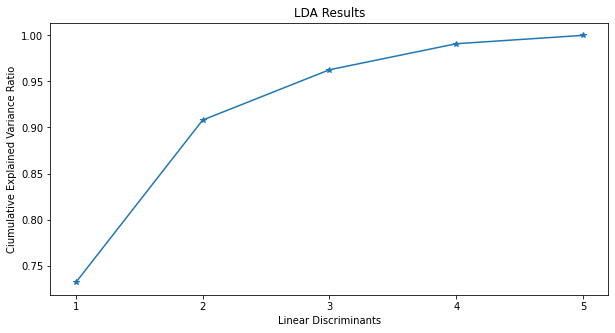

In [100]:
lda = LDA()
lda.fit(TRAINX, TRAINY)

cum_var_ratio = np.cumsum(lda.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(range(1,len(cum_var_ratio)+1), cum_var_ratio, '*-')
plt.title("LDA Results")
plt.xlabel("Linear Discriminants")
plt.ylabel("Ciumulative Explained Variance Ratio")
plt.xticks(range(1,len(cum_var_ratio)+1))
plt.show()

The best 2 Linear Discriminants (LD's) are able to explain > 90% variance of the data. So we can attempt to visualise the data using these two LD's.

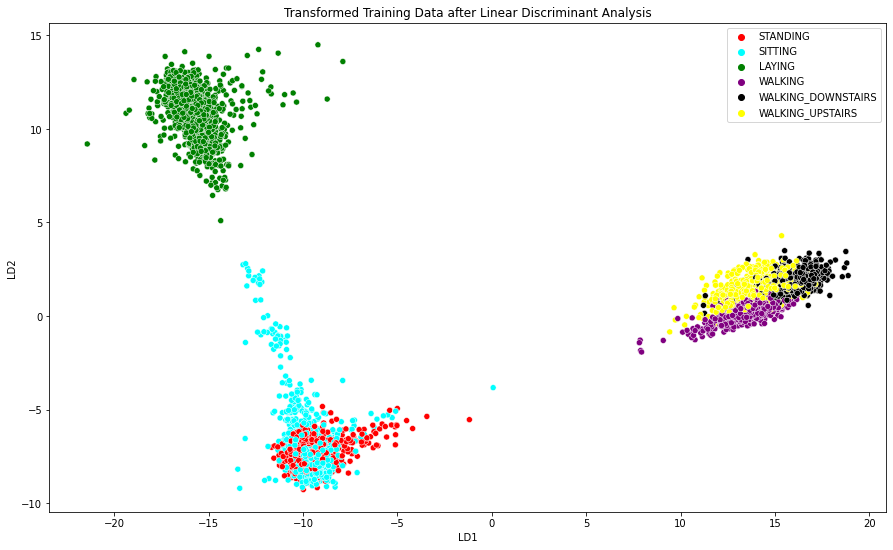

In [101]:
lda = LDA(n_components=2)
lda.fit(TRAINX, TRAINY)
ldaX = pd.DataFrame(lda.transform(TRAINX), columns=['LD1', 'LD2'])
ldaY = LE.inverse_transform(TRAINY)
plt.figure(figsize=(15,9))
sns.scatterplot(x='LD1', y='LD2', hue=ldaY, data=ldaX, palette=["red","cyan","green","purple","black","yellow"])
# plt.legend(LE.classes_)
plt.title("Transformed Training Data after Linear Discriminant Analysis") 
plt.show()

The above data visualisation looks promising with distinct clusters being formed. We can expect LDA to work well for this data.

## Train-Validation Split

In [13]:
trainX, valX, trainY, valY = tts(TRAINX, TRAINY, test_size=0.2, random_state=42, stratify = TRAINY)

## Training Models

### LDA

In [43]:
lda = LDA(store_covariance=True)
lda.fit(trainX, trainY)
pred = lda.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n",classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 98.3%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.94      0.98      0.96       257
          STANDING       0.98      0.94      0.96       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      0.99      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

**The above metrics are evaluated on the Validation Dataset


### QDA

In [44]:
qda = QDA(store_covariance=True)
qda.fit(trainX, trainY)
pred = qda.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=5)*100)+"%")
print("Classification Report:\n",classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 94.018%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       282
           SITTING       0.94      0.83      0.88       257
          STANDING       0.88      0.91      0.89       275
           WALKING       0.97      0.98      0.98       245
WALKING_DOWNSTAIRS       0.92      0.96      0.94       197
  WALKING_UPSTAIRS       0.93      0.97      0.95       215

          accuracy                           0.94      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.94      0.94      0.94      1471

**The above metrics are evaluated on the Validation Dataset


### RFC

In [45]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':[5,10,12,14,16,18,20,22,24,26], 'n_estimators':[50,100,150,200], 'min_samples_split':[10,20,30,40,50]}
# rfc = RFC()
# clf = GridSearchCV(rfc, parameters, cv=5, n_jobs = -1, verbose = 2)
# clf.fit(TRAINX, TRAINY)
# best_model = clf.best_estimator_
# print("Best RandomForestClassifier after GridSearchCV:", best_model)
# print("Best parameters:", clf.best_params_)

In [46]:
best_model = RFC(max_depth = 20, n_estimators = 500, min_samples_split = 2)     # After playing with a few parameters
best_model.fit(trainX, trainY)
pred = best_model.predict(valX)
print("Accuracy using best parameters", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy using best parameters 98.78%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.99      0.96      0.98       257
          STANDING       0.97      0.99      0.98       275
           WALKING       1.00      0.99      0.99       245
WALKING_DOWNSTAIRS       0.98      0.99      0.98       197
  WALKING_UPSTAIRS       0.99      1.00      0.99       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

**The above metrics are evaluated on the Validation Dataset


### XGBoostClassifier

In [47]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':[5,10], 'eta':[0.01,0.1], 'subsample':[0.4,0.5]}
# xgb = XGBC(tree_method = "gpu_hist")
# clf = GridSearchCV(xgb, parameters, cv=5, n_jobs = -1, verbose = 2)
# clf.fit(TRAINX, TRAINY)
# best_model = clf.best_estimator_
# print("Best XGBoostClassifier after GridSearchCV:", best_model)

The above `GridSearchCV` takes about 18 minutes to run.

In [48]:
acc_list_train = []
acc_list_val = []
for i in tqdm(range(100,801,100)):
    xgb = XGBC(verbosity = 0, n_estimators = i, max_depth = 5, eta = 0.1, tree_method = "gpu_hist", subsample = 0.3, random_state=42) 
    xgb.fit(trainX, trainY)
    pred = xgb.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = xgb.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
     
    # print("Number of Estimators:", i, "Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")

100%|██████████| 8/8 [02:27<00:00, 18.38s/it]


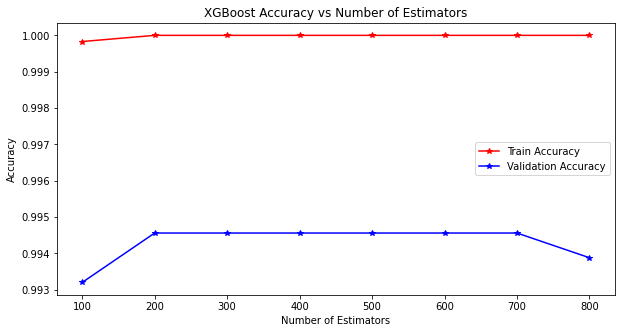

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(100,801,100), acc_list_train, 'r*-', label = "Train Accuracy")
plt.plot(range(100,801,100), acc_list_val, 'b*-', label = "Validation Accuracy")
plt.title("XGBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

400 estimators should be good enough

In [17]:
acc_list_train = []
acc_list_val = []
for i in tqdm(range(4,20)):
    xgb = XGBC(verbosity = 0, n_estimators = 400, max_depth = i, eta = 0.1, tree_method = "gpu_hist", subsample = 0.3, random_state=42) 
    xgb.fit(trainX, trainY)
    pred = xgb.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = xgb.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
     
    # print("Max Depth:", i, "Validation Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")

 19%|█▉        | 3/16 [01:54<08:59, 41.47s/it]

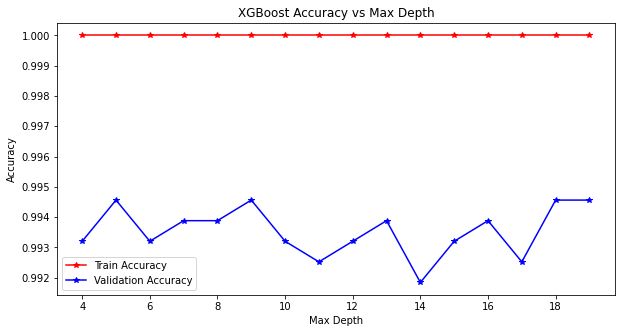

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(4,20), acc_list_train, 'r*-', label = "Train Accuracy")
plt.plot(range(4,20), acc_list_val, 'b*-', label = "Validation Accuracy")
plt.title("XGBoost Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

There is no visible benefit of having `max_depth` > 5

In [ ]:
acc_list_train = []
acc_list_val = []

best_acc = 0
best_eta = 0

for i in tqdm(np.arange(0.01,0.2,0.02)):
    xgb = XGBC(verbosity = 0, n_estimators = 400, max_depth = 5, eta = i, tree_method = "gpu_hist", subsample = 0.3, random_state=42) 
    xgb.fit(trainX, trainY)
    pred = xgb.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = xgb.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
    if acc_list_val[-1] > best_acc:
        best_acc = acc_list_val[-1]
        best_eta = i
     

100%|██████████| 10/10 [02:17<00:00, 13.70s/it]


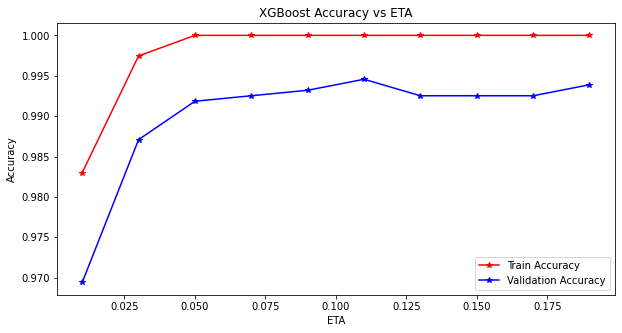

Best ETA: 0.10999999999999997 with Validation Accuracy: 0.9945615227736234


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0.01,0.2,0.02), acc_list_train, 'r*-', label = "Train Accuracy")
plt.plot(np.arange(0.01,0.2,0.02), acc_list_val, 'b*-', label = "Validation Accuracy")
plt.title("XGBoost Accuracy vs ETA")
plt.xlabel("ETA")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("Best ETA:", best_eta, "with Validation Accuracy:", best_acc)

In [126]:
# Best model
xgb = XGBC(verbosity = 0, n_estimators = 400, max_depth = 5, eta = 0.11, tree_method = "gpu_hist", subsample = 0.3, random_state=42) 
xgb.fit(trainX, trainY)
pred = xgb.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 99.32%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.99      0.97      0.98       257
          STANDING       0.97      0.99      0.98       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

**The above metrics are evaluated on the Validation Dataset


### LightGBMClassifier

#### Hyperparameter Tuning

In [53]:

acc_list_train = []
acc_list_val = []

for md in range(4,20):
    lc = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = md)
    lc.fit(trainX, trainY)
    pred = lc.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = lc.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
     
    # print("Max Depth:", md, "Validation Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")

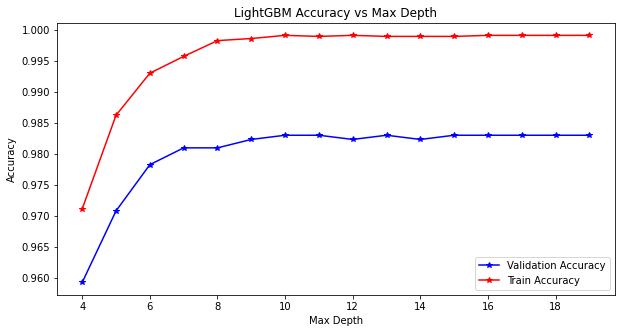

In [54]:
plt.figure(figsize=(10,5))
plt.plot(range(4,20), acc_list_val, 'b*-', label="Validation Accuracy")
plt.plot(range(4,20), acc_list_train, 'r*-', label="Train Accuracy")
plt.title("LightGBM Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model performance plateaus after `max_depth` = 10

In [113]:
acc_list_train = []
acc_list_val = []

best_lr = None
best_acc = 0

for lr in tqdm(np.arange(0.01,0.3,0.02)):
    lc = lgb.LGBMClassifier(learning_rate = lr, max_depth = 5)
    lc.fit(trainX, trainY)
    pred = lc.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = lc.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))

    if best_acc<accuracy_score(valY, pred):
        best_acc = accuracy_score(valY, pred)
        best_lr = lr
     
    # print("Learning Rate:", lr, "Validation Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")

100%|██████████| 15/15 [01:13<00:00,  4.90s/it]


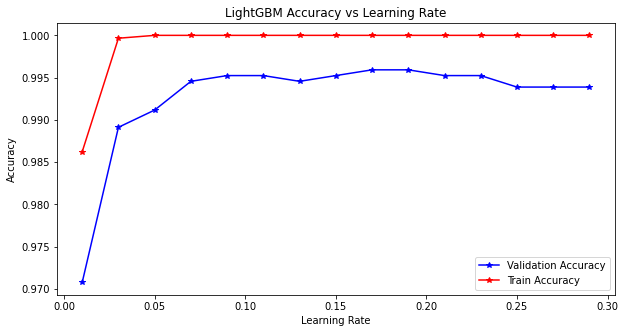

Best Learning Rate: 0.16999999999999998 with Validation Accuracy: 99.59%


In [114]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0.01,0.3,0.02), acc_list_val, 'b*-', label="Validation Accuracy")
plt.plot(np.arange(0.01,0.3,0.02), acc_list_train, 'r*-', label="Train Accuracy")
plt.title("LightGBM Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("Best Learning Rate:", best_lr, "with Validation Accuracy:", str(np.around(best_acc, decimals=4)*100)+"%")

#### Final Model

In [117]:
lc = lgb.LGBMClassifier(learning_rate = 0.17, max_depth = 10)
lc.fit(trainX, trainY)
pred = lc.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 99.52%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.99      0.98      0.99       257
          STANDING       0.99      0.99      0.99       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           1.00      1471
         macro avg       1.00      1.00      1.00      1471
      weighted avg       1.00      1.00      1.00      1471

**The above metrics are evaluated on the Validation Dataset


### KNN Classifier

In [56]:

acc_list_train = []
acc_list_val = []

for nn in tqdm(range(3,20)):
    knn = KNN(n_neighbors = nn)
    knn.fit(trainX, trainY)
    pred = knn.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = knn.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
     
    # print("Number of Neighbors:", nn, "Validation Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")



100%|██████████| 17/17 [00:20<00:00,  1.20s/it]


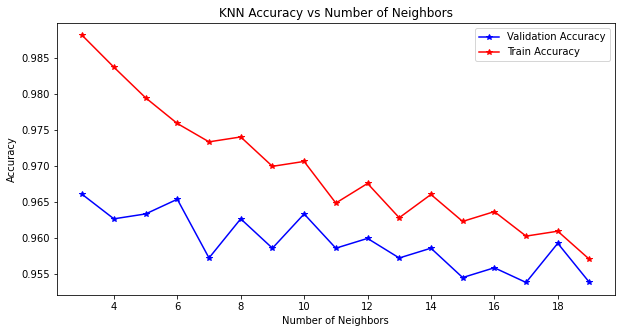

In [57]:
plt.figure(figsize=(10,5))
plt.plot(range(3,20), acc_list_val, 'b*-', label="Validation Accuracy")
plt.plot(range(3,20), acc_list_train, 'r*-', label="Train Accuracy")
plt.title("KNN Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
knn = KNN(n_neighbors=3)
knn.fit(trainX, trainY)
pred = knn.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 96.6%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       282
           SITTING       0.94      0.89      0.91       257
          STANDING       0.90      0.96      0.93       275
           WALKING       0.98      1.00      0.99       245
WALKING_DOWNSTAIRS       0.99      0.98      0.99       197
  WALKING_UPSTAIRS       1.00      0.99      0.99       215

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471

**The above metrics are evaluated on the Validation Dataset


### MLP Classifier

In [15]:

acc_list_train = []
acc_list_val = []

for i in tqdm(range(2,30)):
    mlp = MLPClassifier(hidden_layer_sizes = (i,i,), max_iter = 1000)
    mlp.fit(trainX, trainY)
    pred = mlp.predict(trainX)
    acc_list_train.append(accuracy_score(trainY, pred))
    pred = mlp.predict(valX)
    acc_list_val.append(accuracy_score(valY, pred))
    
    # print("Number of Hidden Layers:", i, "Validation Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")


100%|██████████| 28/28 [05:33<00:00, 11.91s/it]


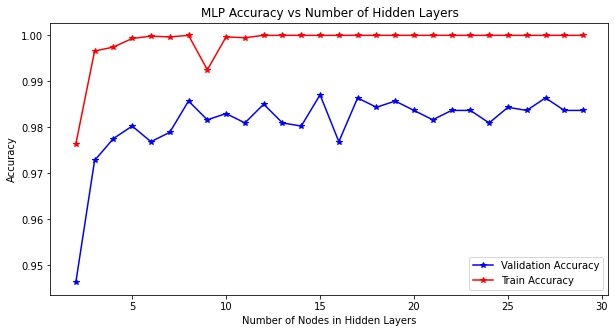

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), acc_list_val, 'b*-', label="Validation Accuracy")
plt.plot(range(2,30), acc_list_train, 'r*-', label="Train Accuracy")
plt.title("MLP Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Nodes in Hidden Layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


For 2 hidden layers, 15 nodes gives the best results as can be seen in the above graph.

In [19]:
clf = MLPClassifier(hidden_layer_sizes = (15,15), random_state=1, max_iter=1000).fit(trainX, trainY)
pred = clf.predict(valX)
print("Accuracy:", str(np.around(accuracy_score(valY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(valY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Validation Dataset")

Accuracy: 98.57000000000001%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       282
           SITTING       0.97      0.95      0.96       257
          STANDING       0.97      0.97      0.97       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

**The above metrics are evaluated on the Validation Dataset


## Evaluation on Test Dataset

### Preprocessing

In [21]:
TEST

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [22]:
TEST.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

No Null values

In [23]:
test = TEST.drop(['subject'], axis=1)

In [24]:
testX = test.drop(['Activity'], axis=1)
testY = LE.transform(test['Activity'])

We will use the same Feature Scaling as we did for training data, since we don't know the distribution of the test data.

In [25]:
testX = pd.DataFrame(scaler.transform(testX), columns=testX.columns)
testX

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,-0.246388,-0.136979,1.668462,-0.742061,-0.814056,-0.150313,-0.759330,-0.819786,-0.164580,-0.781407,...,-0.213757,-0.072779,-0.262320,-0.006596,0.358560,-1.372126,0.579845,-0.450322,0.733571,-0.005244
1,0.164235,0.111059,-0.175548,-0.824544,-0.908299,-0.812607,-0.840212,-0.908595,-0.820280,-0.781407,...,-2.097734,0.576855,0.098679,-0.273719,0.034161,-0.728470,1.938673,-0.407493,0.748840,-0.098112
2,0.014187,-0.204740,-0.159111,-0.865561,-0.913208,-0.855099,-0.858146,-0.913397,-0.862926,-0.864367,...,-0.248637,0.363213,-0.050207,-0.129586,0.446413,0.091042,0.316041,-0.416639,0.744605,-0.081803
3,-0.059637,-0.365579,-0.147960,-0.867620,-0.919858,-0.865472,-0.860199,-0.921086,-0.876002,-0.863173,...,-0.034259,-0.116542,-0.360349,-0.076465,0.339639,0.544845,0.632687,-0.409180,0.758155,-0.073784
4,0.004908,-0.248785,-0.359980,-0.865636,-0.908274,-0.892234,-0.857457,-0.903555,-0.896405,-0.863173,...,-0.984174,-0.709294,-0.719531,-0.032386,-0.094211,1.196836,-0.235517,-0.396070,0.780371,-0.062135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.507661,-0.874731,0.177151,0.707754,0.736850,0.930750,0.647171,0.778197,0.903402,1.201017,...,-0.202496,-0.215797,-0.408096,-1.027739,0.767627,1.440462,-1.449764,-0.316909,0.726262,0.864551
2943,1.265313,-0.527316,0.056964,0.668705,1.072571,0.975451,0.606004,1.022561,0.811203,1.201017,...,-0.093371,-0.041773,-0.243789,-2.213376,-0.836706,-1.095164,0.687383,-0.323647,0.722737,0.856052
2944,1.074319,1.170681,-0.117372,0.614660,0.932720,0.846927,0.571863,0.810133,0.625756,0.874320,...,-0.763187,0.586175,0.514088,-0.564919,0.192712,1.130990,0.772310,-0.323991,0.725764,0.851650
2945,-0.525137,0.886163,0.223235,0.629199,0.559404,0.948698,0.561574,0.508938,0.764738,0.874320,...,-0.684366,0.316410,0.024572,1.294302,-1.832296,1.513441,-0.005058,-0.332514,0.693165,0.874507


We will now train our selected models using the entire training data

### Testing Linear Discriminant Analysis

In [39]:
lda = LDA(store_covariance=True)
lda.fit(TRAINX, TRAINY)
pred = lda.predict(testX)
print("Accuracy:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n",classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy: 96.23%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.88      0.92       491
          STANDING       0.90      0.96      0.93       532
           WALKING       0.98      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.98      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

**The above metrics are evaluated on the Test Dataset


### Testing Quadratic Discriminant Analysis

In [35]:
qda = QDA(store_covariance=True)
qda.fit(TRAINX, TRAINY)
pred = qda.predict(testX)
print("Accuracy:", str(np.around(accuracy_score(testY, pred), decimals=5)*100)+"%")
print("Classification Report:\n",classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy: 79.742%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.79      0.84       491
          STANDING       0.84      0.86      0.85       532
           WALKING       0.99      0.35      0.52       496
WALKING_DOWNSTAIRS       0.51      0.97      0.67       420
  WALKING_UPSTAIRS       0.84      0.82      0.83       471

          accuracy                           0.80      2947
         macro avg       0.85      0.80      0.78      2947
      weighted avg       0.86      0.80      0.79      2947

**The above metrics are evaluated on the Test Dataset


### Testing Random Forest Classifier

In [34]:
rfc = RFC(max_depth = 20, n_estimators = 500, min_samples_split = 2)
rfc.fit(TRAINX, TRAINY)
pred = rfc.predict(testX)
print("Accuracy:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy: 92.60000000000001%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.89      0.90       491
          STANDING       0.90      0.91      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947

**The above metrics are evaluated on the Test Dataset


### Testing XGBoostClassifier

In [32]:
xgb = XGBC(n_estimators = 400, max_depth = 5, eta = 0.11, tree_method = "gpu_hist", subsample = 0.3, random_state=42, verbosity = 0) 
xgb.fit(TRAINX, TRAINY)
pred = xgb.predict(testX)
print("Accuracy on Test Dataset:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy on Test Dataset: 95.59%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.91      0.93       491
          STANDING       0.92      0.97      0.94       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.98      0.93      0.96       420
  WALKING_UPSTAIRS       0.94      0.93      0.94       471

          accuracy                           0.96      2947
         macro avg       0.96      0.95      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

**The above metrics are evaluated on the Test Dataset


### Testing LightGBMClassifier

In [30]:
lc = lgb.LGBMClassifier(learning_rate = 0.17, max_depth = 10)
lc.fit(TRAINX, TRAINY)
pred = lc.predict(testX)
print("Accuracy on Test Dataset:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy on Test Dataset: 93.99%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.85      0.89       491
          STANDING       0.88      0.95      0.91       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.93      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

**The above metrics are evaluated on the Test Dataset


### Testing KNN Classifier

In [33]:
knn = KNN(n_neighbors=3)
knn.fit(TRAINX, TRAINY)
pred = knn.predict(testX)
print("Accuracy:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy: 87.38%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.85      0.75      0.80       491
          STANDING       0.79      0.91      0.84       532
           WALKING       0.82      0.98      0.89       496
WALKING_DOWNSTAIRS       0.95      0.74      0.83       420
  WALKING_UPSTAIRS       0.90      0.89      0.89       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

**The above metrics are evaluated on the Test Dataset


### Testing MLPClassifier

In [27]:
clf = MLPClassifier(hidden_layer_sizes = (15,15), random_state=1, max_iter=1000).fit(TRAINX, TRAINY)
pred = clf.predict(testX)
print("Accuracy:", str(np.around(accuracy_score(testY, pred), decimals=4)*100)+"%")
print("Classification Report:\n", classification_report(testY, pred, target_names=LE.classes_))
print("**The above metrics are evaluated on the Test Dataset")

Accuracy: 93.76%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.95      0.88      0.91       491
          STANDING       0.86      0.95      0.91       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
  WALKING_UPSTAIRS       0.92      0.95      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

**The above metrics are evaluated on the Test Dataset


### Conclusion

We can see that **Linear Discriminant Analysis** and **XGBoostClassifier** are the best models to use for our data. Let us now create a *pipeline* using these two models.

# Creating a Pipeline

Our aim is to implement an *end-to-end pipeline* that will be used to obtain predictions on data. It will consist of the following components:<br>
* Data Import<br>
* Preprocessing<br>
* Model Training<br>
* Evaluation<br>

In [1]:
class Pipeline():
    def __init__(self, model, train, test, target, scaler):
        print("Initializing Pipeline...", end=" ")
        self.model = model.lower()
        self.train = train
        self.test = test
        self.target = target
        self.scaler = scaler.lower()

        self.MODEL = None   # This will be the model object
        print("✔")

    def __set_inputs(self):
        print("Setting up the Pipeline...", end = " ")

        # Feature Scaling
        if self.scaler == "standardscaler":
            self.scaler = StandardScaler()
        elif self.scaler == "minmaxscaler":
            self.scaler = MinMaxScaler()
        elif self.scaler == "maxabsscaler":
            self.scaler = MaxAbsScaler()

        # Models
        if self.model == "lda":
            self.MODEL = LDA()
        elif self.model == "xgbc":
            self.MODEL = XGBC()
        print("✔")

    def __import_data(self):
        print("Importing Data...", end = " ")

        # If URL is given, read the data from URL
        if type(self.train) == str:
            self.train = pd.read_csv(self.train)

        if type(self.test) == str:
            self.test = pd.read_csv(self.test)
        print("✔")

    def __preprocessing(self):
        print("Preprocessing Data...", end = " ")

        # Converting dataset to correct format
        self.train = self.train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

        self.train.dropna(inplace = True)
        self.train.reset_index(inplace = True)
        self.train.drop("index", axis = 1, inplace = True)
        self.train.drop("subject", axis = 1, inplace = True)    # Useless for classification
 
        self.features = [i for i in self.train.columns if i != self.target]

        self.scaler.fit(self.train[self.features])  # Fit the scaler to the training data
        self.train[self.features] = self.scaler.transform(self.train[self.features])

        self.LE = LabelEncoder()    # Label Encoding
        self.LE.fit(self.train[self.target])
        self.train[self.target] = self.LE.transform(self.train[self.target])

        self.test = self.test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

        self.test.dropna(inplace = True)
        self.test.reset_index(inplace = True)
        self.test.drop("index", axis = 1, inplace = True)
        self.test.drop("subject", axis = 1, inplace = True)

        self.test[self.features] = self.scaler.transform(self.test[self.features])
        self.test[self.target] = self.LE.transform(self.test[self.target])
        print("✔")

    def __set_params(self):
        if self.model == "lda":
            self.MODEL = LDA()
        elif self.model == "xgbc":  # XGBoostClassifier with the tuned parameters 
            self.MODEL = XGBC(n_estimators = 400, max_depth = 5, eta = 0.11, tree_method = "gpu_hist", subsample = 0.3, random_state=42, verbosity = 0) 
    
    def __train_model(self):
        print("Training Model...", end = " ")
        self.MODEL.fit(self.train[self.features], self.train[self.target])
        print("✔")
    
    def evaluate(self):
        try:
            self.__set_inputs()
            self.__import_data()
            self.__preprocessing()
            self.__set_params()
            self.__train_model()
            print("Evaluating Model...", end = "")
            pred = self.MODEL.predict(self.test[self.features])

            # Storing predictions in a CSV file
            predictions = pd.DataFrame(self.LE.inverse_transform(pred), columns = ["Activity"])
            predictions.to_csv("predictions.csv", index = False)

            # Obtaining the metrics
            acc = accuracy_score(self.test[self.target], pred)
            cr = classification_report(self.test[self.target], pred, target_names=self.LE.classes_)
            print("✔")

            # Printing the metrics
            clear_output(wait = True)
            time.sleep(1)
            print("Results:\n\nAccuracy on Test Dataset:", str(np.around(acc, decimals=4)*100)+"%")
            print("Classification Report:\n", cr)
        except:
            print("Error!\n\nInvalid Parameters")   # Error handling


## Testing the Pipeline

In [4]:
PL = Pipeline("LDA", "train.csv", "test.csv", "Activity", "MaxAbsScaler")
PL.evaluate()

Results:

Accuracy on Test Dataset: 96.23%
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.88      0.92       491
          STANDING       0.90      0.96      0.93       532
           WALKING       0.98      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.98      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

